In [5]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D
from keras.layers import LSTM
from keras.datasets import imdb

In [6]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

In [7]:
x_train = sequence.pad_sequences(x_train, maxlen=400)
x_test = sequence.pad_sequences(x_test, maxlen=400)

In [8]:
model = Sequential()
model.add(Embedding(5000,
                   128,
                   input_length=400))
model.add(Dropout(0.2))
model.add(Conv1D(256,
                3,
                padding='valid',
                activation='relu',
                strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(128))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


In [9]:
history = model.fit(x_train, y_train,
         batch_size=32,
         epochs=2,
         validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 822s 33ms/step - loss: 0.3911 - acc: 0.8185 - val_loss: 0.2944 - val_acc: 0.8787
Epoch 2/2
25000/25000 [==============================] - 468s 19ms/step - loss: 0.2419 - acc: 0.9057 - val_loss: 0.2854 - val_acc: 0.8802


In [10]:
print("Accuracy : %.4f" % (model.evaluate(x_test, y_test)[1]))

25000/25000 [==============================] - 109s 4ms/step
Accuracy : 0.8802


In [22]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

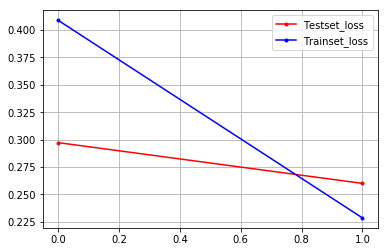

In [25]:
import numpy as np
import matplotlib.pyplot as plt
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', 
        c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker='.', 
        c="blue", label="Trainset_loss")
plt.legend(loc='upper right')
plt.grid()
plt.show()